# 决策树-分类树

导入需要的包

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
# 查看数据形状
wine.data.shape

(178, 13)

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
# test_size用于设置20%作为测试集数据。
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [20]:
# 实例化模型
clf = tree.DecisionTreeClassifier(criterion="entropy")
# 训练
clf = clf.fit(x_train,y_train)
# 返回预测的准确性
score = clf.score(x_test,y_test)
print(score)

0.9629629629629629


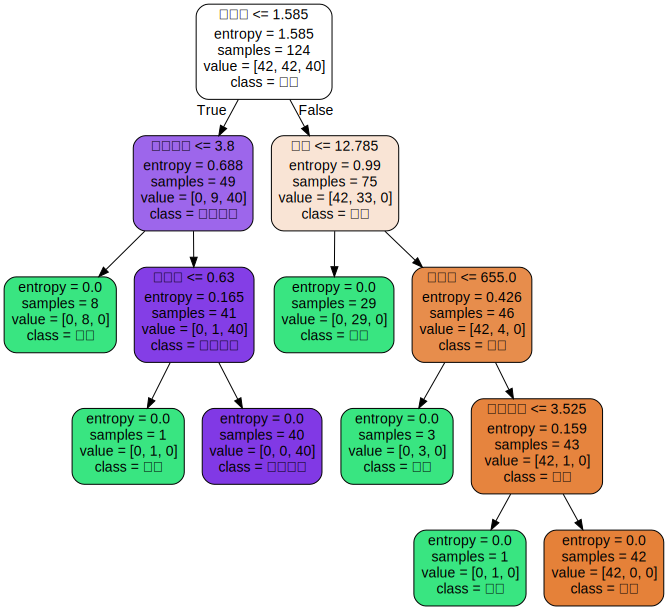

In [23]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True # 填充的颜色
                                ,rounded=True # 节点的形状
                                )
graph = graphviz.Source(dot_data)
graph

In [24]:
#输出特征重要性
clf.feature_importances_

array([0.27794263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45068863, 0.        , 0.03451859, 0.17193815,
       0.        , 0.        , 0.064912  ])

In [25]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.2779426303988571),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.45068862893076306),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.03451859263592205),
 ('颜色强度', 0.17193814583255307),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.06491200220190485)]

## random_state

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。

In [53]:
# 实例化模型
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
# 训练
clf = clf.fit(x_train,y_train)
# 返回预测的准确性
score = clf.score(x_test,y_test)
print(score)

0.9814814814814815


## splitter
splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能
性。当然，树一旦建成，我们依然使用剪枝参数来防止过拟合。

In [54]:
# 实例化模型
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                 )
# 训练
clf = clf.fit(x_train,y_train)
# 返回预测的准确性
score = clf.score(x_test,y_test)
print(score)

0.8888888888888888


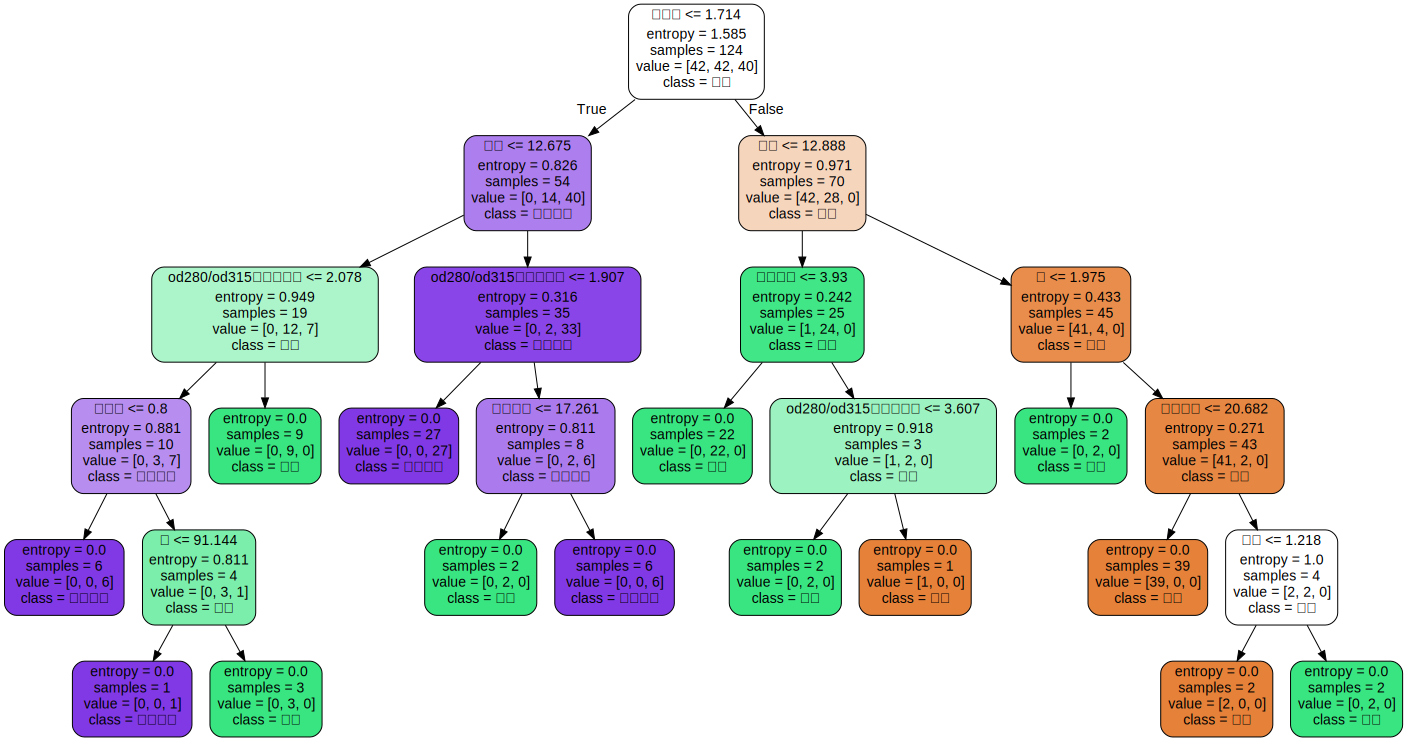

In [55]:
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True # 填充的颜色
                                ,rounded=True # 节点的形状
                                )
graph = graphviz.Source(dot_data)
graph 

## 防止过拟合

剪枝策略对决策树的影响巨大，正确的剪枝策略是优化,决策树算法的核心。sklearn为我们提供了不同的剪枝策略：

* max_depth
* min_samples_leaf && min_samples_split

0.9814814814814815


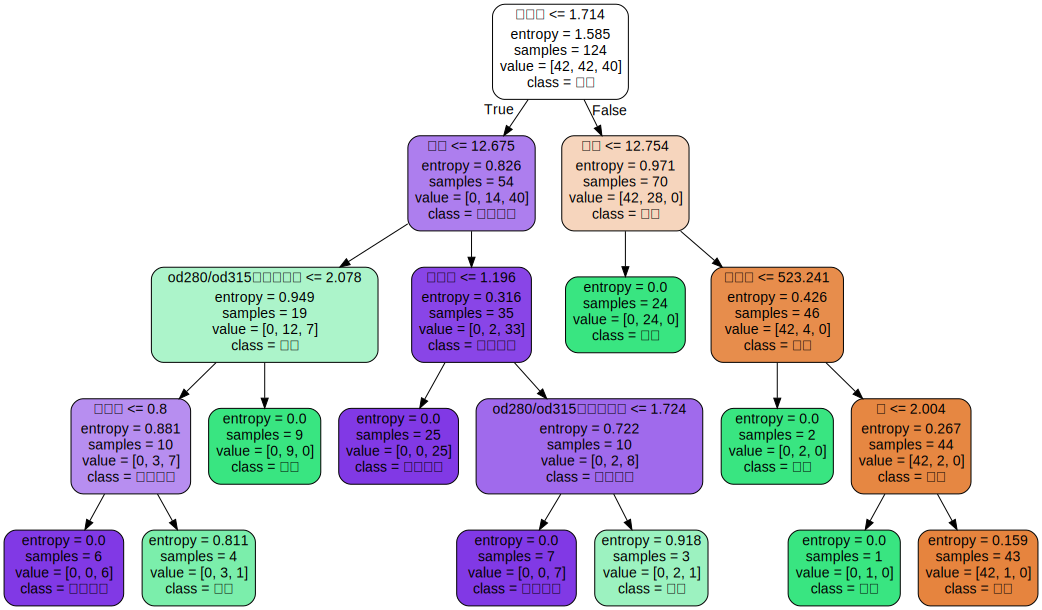

In [62]:
# 实例化模型
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=4
                                  #,min_samples_leaf=5
                                  #,min_samples_split=8
                                 )
# 训练
clf = clf.fit(x_train,y_train)
# 返回预测的准确性
score = clf.score(x_test,y_test)
print(score)

dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True # 填充的颜色
                                ,rounded=True # 节点的形状
                                )
graph = graphviz.Source(dot_data)
graph 

## 确定最优剪枝参数

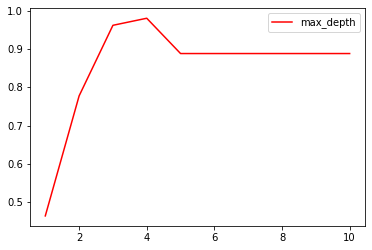

In [66]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

## 重要的接口和属性

In [68]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(x_test)

array([16, 13,  8, 18, 10, 16, 23, 23,  8, 23, 23, 23,  4, 16, 10,  8, 13,
        8, 10, 23, 10, 16, 16, 23, 13, 23, 23, 23, 23, 16, 16, 18, 16, 18,
       23, 25, 23,  8,  4, 21, 16, 25, 16, 13, 19, 16,  8, 23, 23, 16, 25,
       23,  4, 16])

In [70]:
#predict返回每个测试样本的分类结果/回归
clf.predict(x_test)

array([1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1,
       1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 0, 2, 1])

# 决策树-回归树

导入需要的库

In [72]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

创建一条含有噪声的正弦曲线

In [73]:
# np.random.rand(数组结构),生成随机数组的函数
rng = np.random.RandomState(1)
# 随机数排序后，转成二维矩阵
X = np.sort(5*rng.rand(80,1),axis=0)
# 使用ravel()函数降维
y = np.sin(X).ravel()
# 增加噪声
y[::5] += 3*(0.5-rng.rand(16))

实例化 和 训练模型 

In [74]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

导入测试集预测结果 

In [75]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

绘制图像

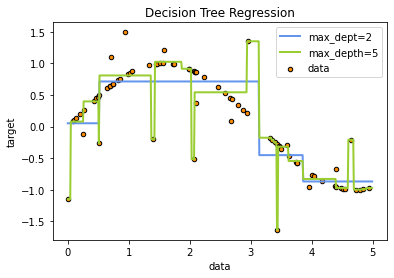

In [76]:
plt.figure()
plt.scatter(X,y,s=20,edgecolors="black",c="darkorange",label="data")
plt.plot(X_test,y_1,color="cornflowerblue",label="max_dept=2",linewidth=2)
plt.plot(X_test,y_2,color="yellowgreen",label="max_depth=5",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()